# Gradient Descent

<img src="https://i2.wp.com/lh6.ggpht.com/-5RFMcz2bzWI/VA9NuUkB_vI/AAAAAAAAAdM/_DqqYO0nbX4/im2_thumb%25255B1%25255D.png"></img>

Gradient descent is the most important algorithm in machine learning (ML). It is used in almost all the ML models and is what differentiate traditional statistics from ML. By optimizing the parameters of the gradient descent we optimize the predictive model.
 
To understand gradient descent, we need to define some important concepts.
 


## Loss function

The loss function, also known as the cost function, is the measure we will use to calibrate the model. There are many types of loss functions. The selection of the loss function depends on the algorithm we want to run, and the question we want to answer (how we want to model the Y).
 
One of the most commonly used loss function is the Log-loss. The formula of the MSE is:
 
<b> 
J(w,b) = - 𝞢(ylogŷ + (1-y)log(1-ŷ))/ n

</b> 
 
This mean that we take difference between the real y and the predicted-y, square each of them, and sum all and divide by the number of rows in the dataset.


In [2]:
loss_function <- function(y,pred) { 
    return(-sum((y*log(pred))+((1-y)*log(1-pred)))/length(y) )
}


## Global Minima
The global minima of the loss function is defined as the smallest value of the loss function. In other words, we find the global minima when we reduce the error at the lowest possible value.

<img src="https://cdn-images-1.medium.com/max/602/0*gWBpMIJ7yRVAaAIA."></img>

## Learning rate
 
The learning rate can be defined as the number of 'jumps' we make when trying to reduce the global minima while calculating the optimal values for the weights. We have to be careful with this parameter because a high value may miss out the global minima, while a very low value will increase a lot the calculation time. The learning rate parameter in many functions is called as <b> alpha </b>.

<table><tr>
    <td cols="2"> 
        <h2> Problems caused by too low or high learning rates </h2> 
    </td>
    </tr><tr>
    <td> 
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDZHOlr8UTVvLoA3adcxB7FQsVPusBU7lPSsVB-lunzaEPwahAQg" width="400" height="200"></img> 
        <br> <h4> High Learning Rate </h4>
    </td>
    <td> 
        <img src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0403.png" width="400" height="200"></img> 
        <br> <h4> Low Learning Rate </h4>
    </td>
</tr></table>

## Gradient Descent
 
The formula for the calculation of the gradient descent is:
 
<img src="https://i2.wp.com/2.bp.blogspot.com/-ZxJ87cWjPJ8/TtLtwqv0hCI/AAAAAAAAAV0/9FYqcxJ6dNY/s320/gradient+descent+algorithm+OLS.png?zoom=1.25&resize=320%2C181"></img>
 
This means that the values of the weights (called theta or ϴ) are calculated using the loss function (Jϴ).
 
The initial theta values are generated randomly and the loss function is calculated using them. The calculation is made as follows:
 
 
<center>
    Y-hat = ϴ<sub>0</sub> + x<sub>1</sub>ϴ<sub>1</sub> + … + x<sub>n</sub>ϴ<sub>n</sub>
</center>
 
Then the loss function is calculated. If the model did not converged (the global minima was not reached), we increase/decrease theta by the learning rate, and recalculate the newly predicted Y (Y-hat). This is repeated until the global minima is reached.
 


In [11]:
sigma <- function(z) {
   yhat <- 1/(1+exp(-z))
   return(yhat)
}

In [12]:
### The gradient descent requires two values: learning rate and number of iterations.

gradientDesc <- function(x, y, learn_rate=1e-6, max_iter=1e3) {
  #plot(x, y, col = "blue", pch = 20)
  conv_threshold <- 1e-4
  n <- length(y)
  m <- runif(1, 0, 1)
  c <- runif(1, 0, 1)
  yhat <- sigma(m * x + c)
  cost <- loss_function(y,yhat)
  converged = F
  iterations = 0
  while(converged == F) {
    ## Implement the gradient descent algorithm
    m_new <- m - learn_rate * (sum((yhat - y) * x))
    c_new <- c - learn_rate * (sum(yhat - y))
    m <- m_new
    c <- c_new
    yhat <- sigma(m * x + c)
    cost_new <- loss_function(y,yhat)
    if(cost - cost_new <= conv_threshold) {
      #abline(c, m) 
      converged = T
      print(paste("Optimal intercept:", c, "Optimal slope:", m))
      return(data.frame(w=m,b=c,loss=cost_new))
    }
    iterations = iterations + 1
    if(iterations > max_iter) { 
      #abline(c, m) 
      converged = T
      print(paste("Optimal intercept:", c, "Optimal slope:", m))
      return(data.frame(w=m,b=c,loss=cost_new))
    }
  }
}




In [6]:
# Run the function 
gradientDesc(mtcars$wt, mtcars$am, 0.0001, 2500000)


[1] "Optimal intercept: 12.0403061856611 Optimal slope: -4.02394986162987"


w,b,loss
-4.02395,12.04031,0.2996263


In [5]:
mod <- glm(mtcars$am ~ mtcars$wt,family="binomial")
mod$coefficients

(Intercept)   mtcars$wt 
   12.04037    -4.02397

In [23]:
library(dplyr)
library(ggplot2)

In [21]:
## iterating with the learning rate and number of iterations
res <- NULL

learning_rate <- c(1e-1,1e-2,1e-3,1e-4,1e-5,1e-6)
number_iterations <- c(1e2,1e3,1e4,1e5,1e6,1e7)
for (iter in number_iterations) {
    for (lr in learning_rate) {
        gd <- gradientDesc(mtcars$wt, mtcars$am, lr, iter)
        res <- rbind(res, data.frame(cbind(number_iterations=iter,learning_rate=lr, gd)))
    }
}


[1] "Optimal intercept: -0.9041862927206 Optimal slope: -5.03825304631068"
[1] "Optimal intercept: 2.24232208191224 Optimal slope: -0.910143326550316"
[1] "Optimal intercept: 0.329692893800573 Optimal slope: -0.32600630552521"
[1] "Optimal intercept: 0.579600451788943 Optimal slope: 0.0202518852064509"
[1] "Optimal intercept: 0.970606377131745 Optimal slope: -0.0118093115052198"
[1] "Optimal intercept: 0.748792671099923 Optimal slope: 0.511353609389838"
[1] "Optimal intercept: -0.999387949700146 Optimal slope: -5.99658013080776"
[1] "Optimal intercept: 7.79517187353246 Optimal slope: -2.67696744491788"
[1] "Optimal intercept: 2.50520038310694 Optimal slope: -0.992452083797371"
[1] "Optimal intercept: 0.380644686280799 Optimal slope: -0.341127795005047"
[1] "Optimal intercept: 0.242614484375177 Optimal slope: 0.0361982963926475"
[1] "Optimal intercept: 0.229876908166708 Optimal slope: 0.0875963624808837"
[1] "Optimal intercept: -1.63490318957038 Optimal slope: -5.73156228023402"
[1] "Op

In [17]:
res <- res %>% arrange(learning_rate,number_iterations)
res

number_iterations,learning_rate,w,b,loss
1e+02,1e-06,0.37066584,0.3078896,1.2228398
1e+03,1e-06,0.41942498,0.4546044,1.3705127
1e+04,1e-06,0.07023608,0.7837705,0.9336345
1e+05,1e-06,-0.29377255,0.2216247,0.6017725
1e+06,1e-06,-0.89604943,2.1971823,0.4687447
1e+07,1e-06,0.05393369,0.7563529,0.9026600
1e+02,1e-05,0.56667729,0.8920667,1.8703303
1e+03,1e-05,0.35587281,0.2823771,1.1880084
1e+04,1e-05,-0.28762210,0.2010211,0.6034969
1e+05,1e-05,-0.83433711,1.9990816,0.4794234


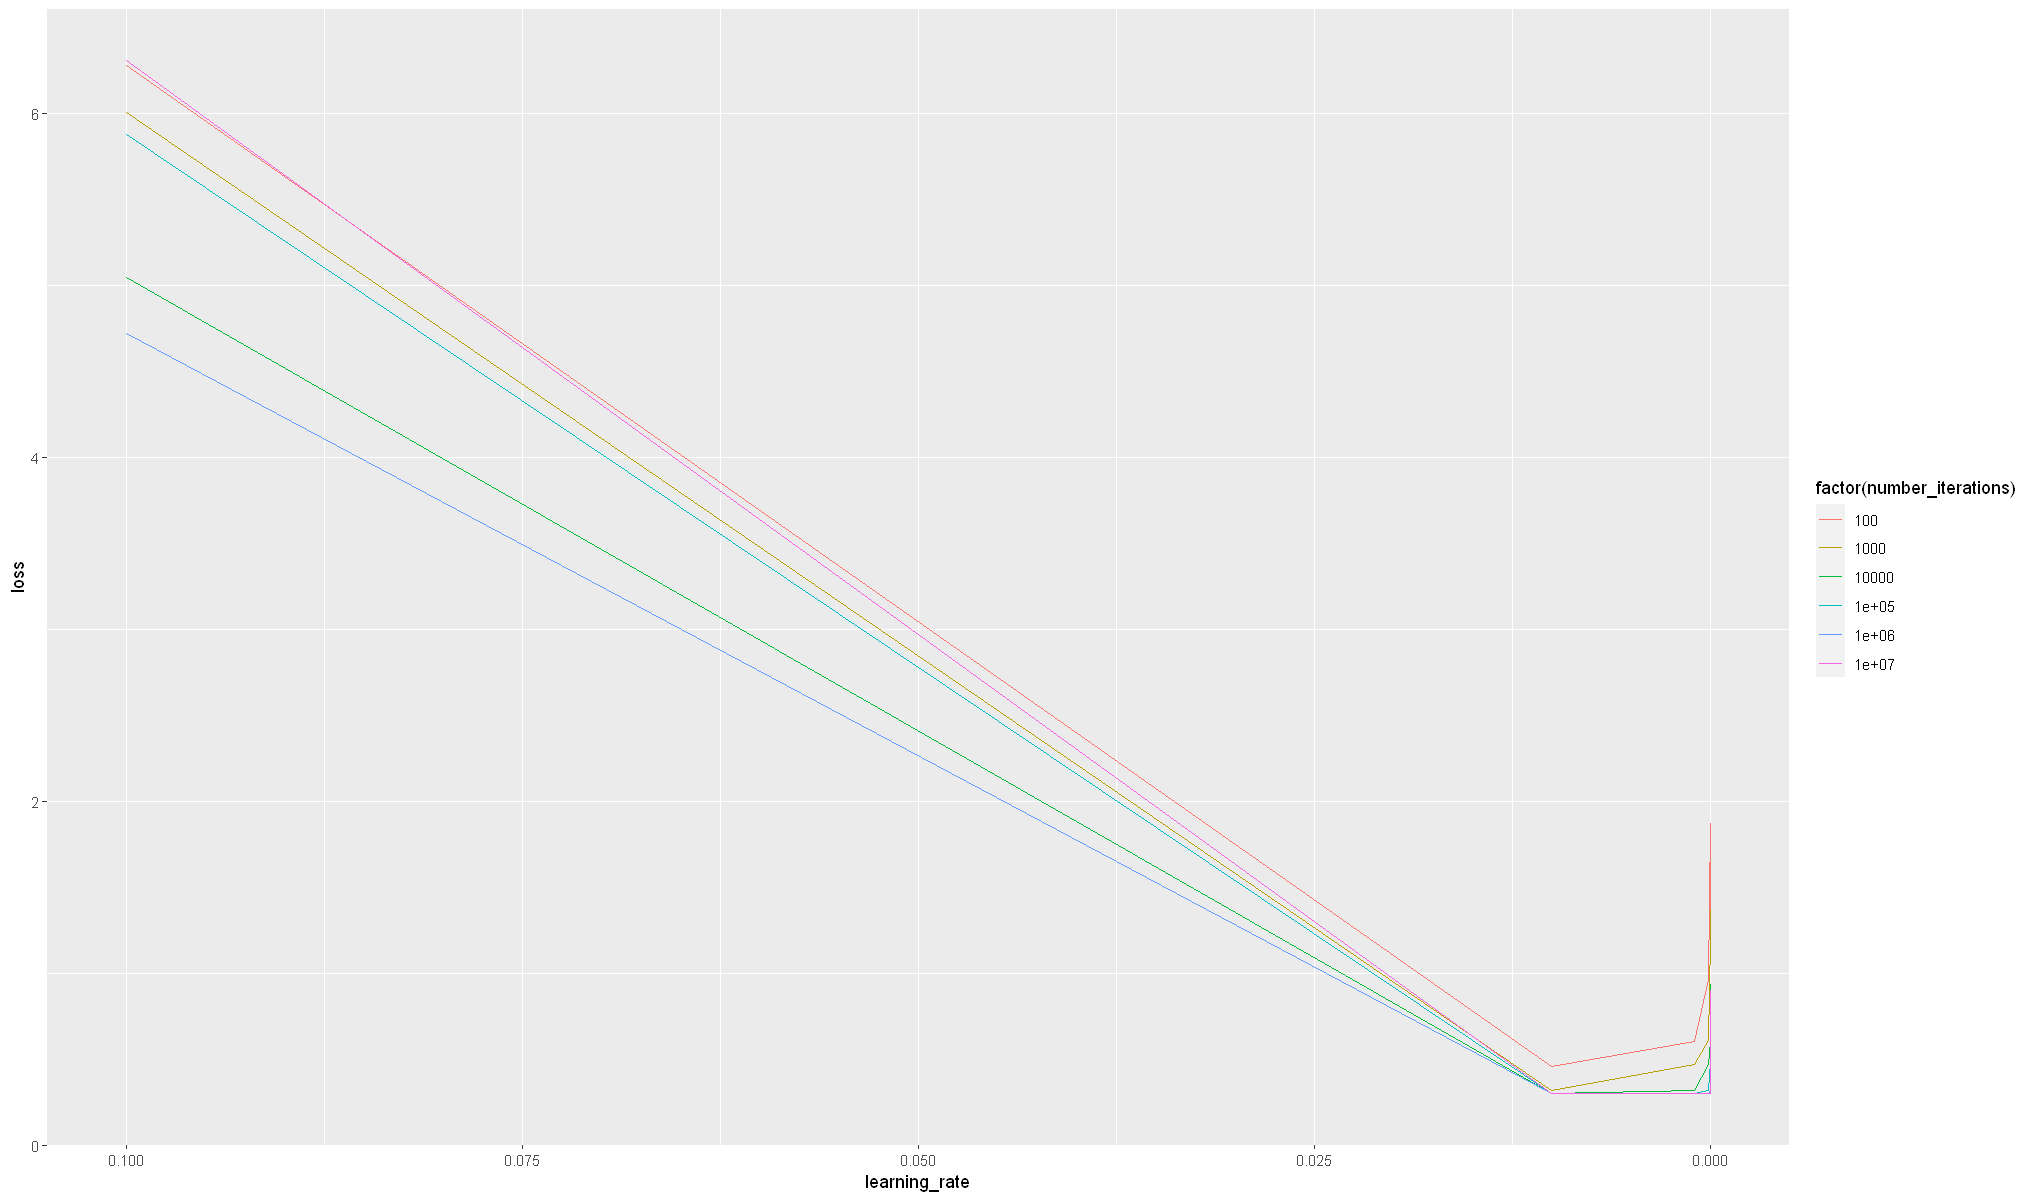

In [20]:
options(repr.plot.width = 17, repr.plot.height = 10)
ggplot(data=res) +
  geom_line(aes(x=learning_rate, y=loss, color=factor(number_iterations), group=factor(number_iterations))) +
  scale_x_reverse()

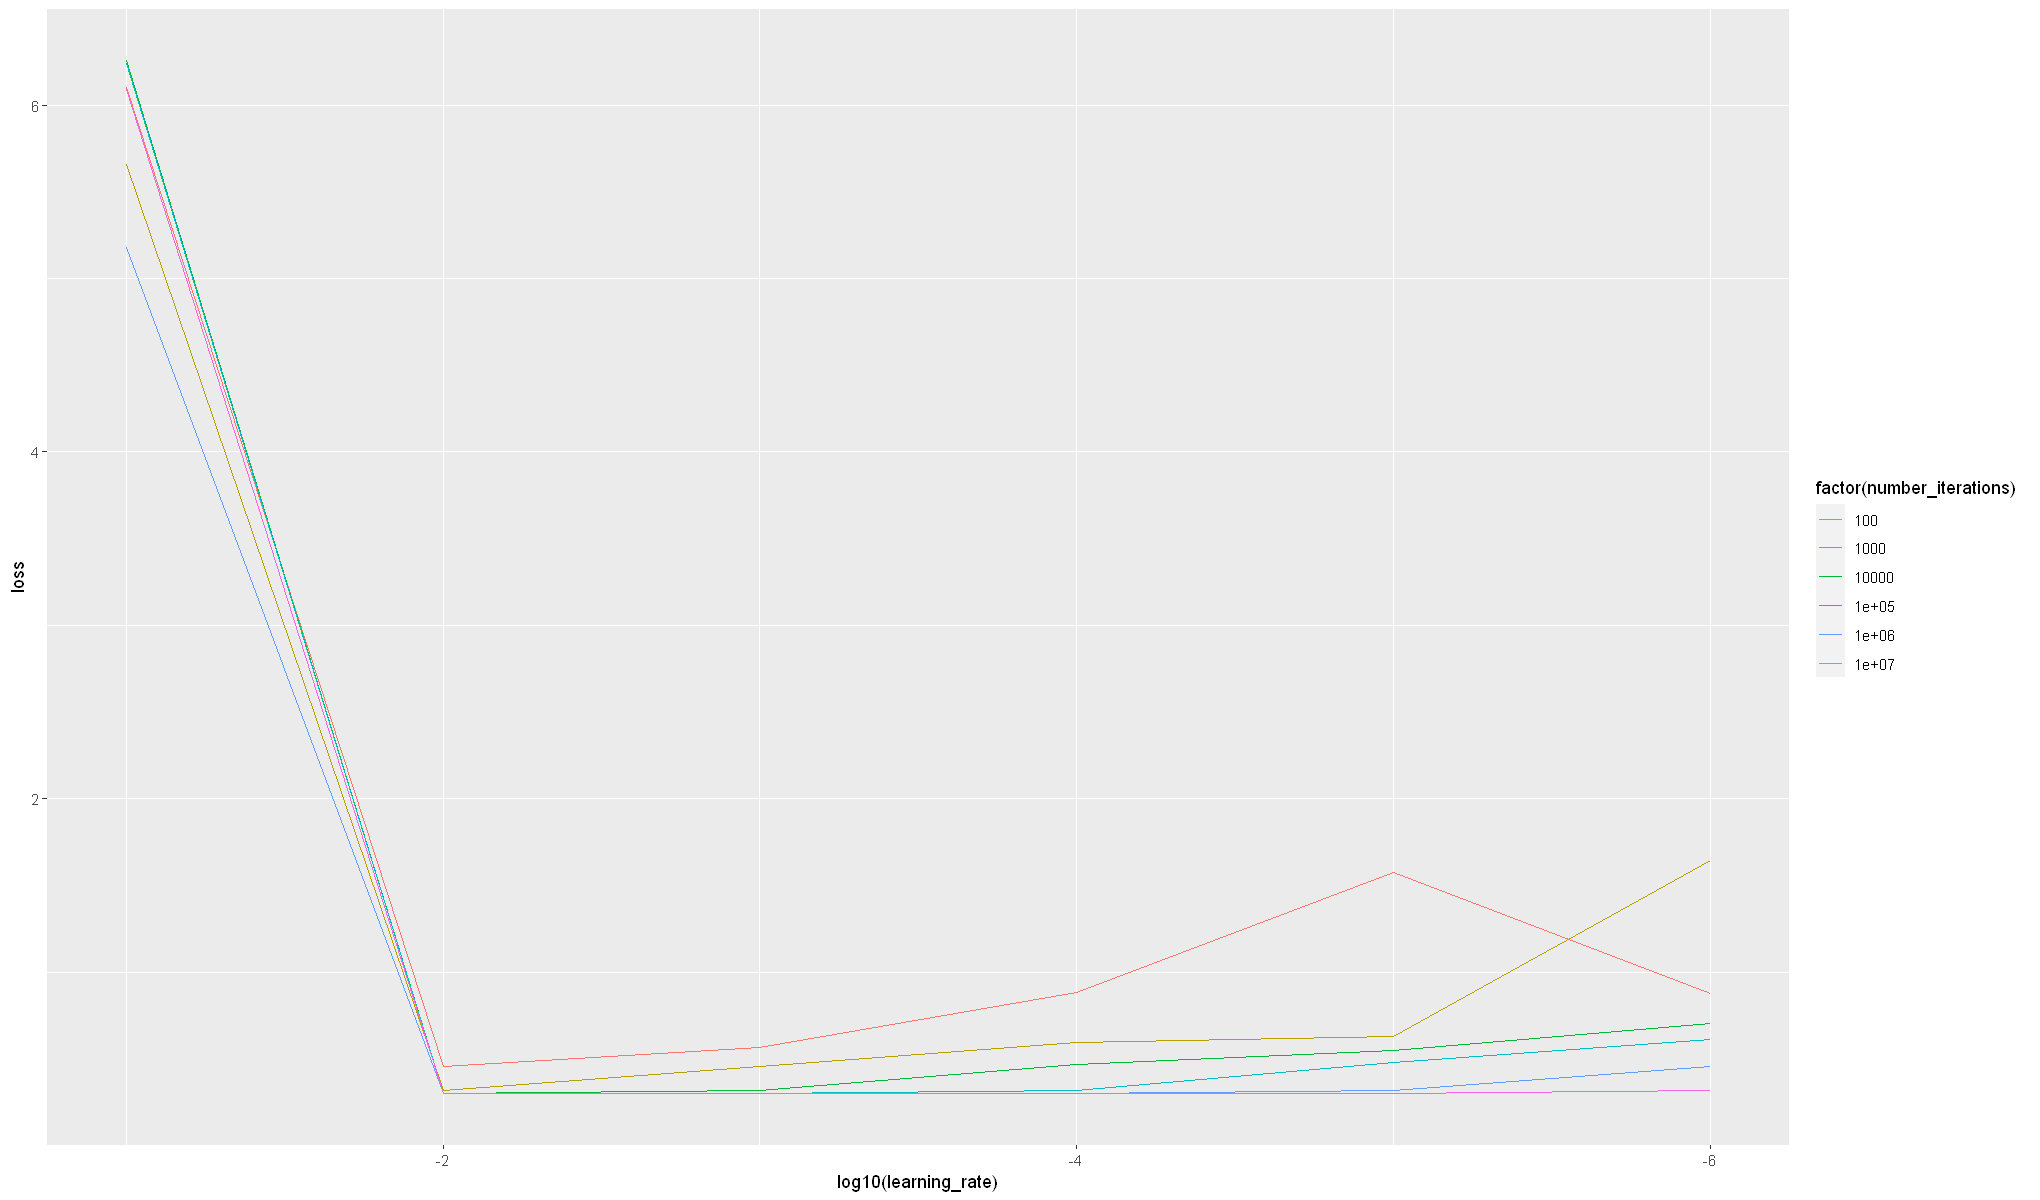

In [40]:
options(repr.plot.width = 17, repr.plot.height = 10)
ggplot(data=res) +
  geom_line(aes(x=log10(learning_rate), y=loss, color=factor(number_iterations), group=factor(number_iterations))) +
  scale_x_reverse()

In [42]:
res <- res %>% arrange(loss)
res

number_iterations,learning_rate,w,b,loss
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e+07,1e-04,-4.0239700,12.0403697,0.2996263
1e+06,1e-03,-4.0239700,12.0403697,0.2996263
1e+07,1e-03,-4.0239700,12.0403697,0.2996263
1e+05,1e-02,-4.0239700,12.0403697,0.2996263
1e+06,1e-02,-4.0239700,12.0403697,0.2996263
1e+07,1e-02,-4.0239700,12.0403697,0.2996263
1e+05,1e-03,-4.0075837,11.9885701,0.2996284
1e+07,1e-05,-4.0075645,11.9885094,0.2996284
1e+06,1e-04,-4.0074418,11.9881215,0.2996284


In [46]:
gradientDesc(mtcars$wt, mtcars$am, learn_rate=1e-02,max_iter=1e+05)

[1] "Optimal intercept: 12.0403697286552 Optimal slope: -4.02396996217254"


w,b,loss
<dbl>,<dbl>,<dbl>
-4.02397,12.04037,0.2996263


In [53]:
predict <- function(x,w,b,cutoff=0.5) {
    prob <- sigma((x*w)+b)
    yhat <- ifelse(prob>=cutoff,1,0)
    return(data.frame(prob=prob, yhat=yhat))
}

In [55]:
pred <- predict(mtcars$wt, -4.02397, 12.04037)
cbind(pred, y=mtcars$am)

prob,yhat,y
<dbl>,<dbl>,<dbl>
8.172116e-01,1,1
6.157284e-01,1,1
9.373069e-01,1,1
2.897304e-01,0,0
1.415972e-01,0,0
1.320944e-01,0,0
8.905707e-02,0,0
3.108616e-01,0,0
3.463470e-01,0,0


In [56]:
## contingency table
table(yhat=pred$yhat, y=mtcars$am )

    y
yhat  0  1
   0 18  2
   1  1 11

# Multivariate Gradient Descent

In [246]:
loss_function <- function(y,pred) {
    ll <- ifelse(y==0,(1-y)*log(1-pred),y*log(pred))
    return(-sum(ll)/length(y))
}

In [247]:
loss_function(y,yyhat)

[1] 0.9432204

In [224]:
sigma <- function(z) {
   yhat <- 1/(1+exp(-z))
   return(yhat)
}

In [271]:
gradientDesc <- function(X, y, learn_rate=1e-6, max_iter=1e3, normalize=FALSE) {
  conv_threshold <- 1e-4
  n <- length(y)
  m <- ncol(X)
  ## add the intercept
  X <- as.matrix(cbind(b=rep(1,n),X))
  W <- as.matrix(runif(m+1, 0, 1))
  ## normalize X
  if (normalize==TRUE) {
      X <- X %*% diag(1/colSums(X))
  }
  ## recover intercept
  X[,1] <- 1
  yhat <- sigma(X %*% W)
  cost <- loss_function(y,yhat)
  converged = F
  iterations = 0
  while(converged == F) {
    ## Implement the gradient descent algorithm
    W_new <- W - t(learn_rate * (t(yhat-y) %*%  X))
    W <- W_new
    yhat <- sigma(X %*% W)
    cost_new <- loss_function(y,yhat)
    if(iterations > max_iter) { 
      converged = T
      print(paste("Optimal weights:", W))
      return(list(w=W,loss=cost_new))
    }
    iterations = iterations + 1
  }
}


In [261]:
X <- mtcars[,1:5]
y <- mtcars$am

In [272]:
gradientDesc(X,y,learn_rate=1e-3, max_iter=1e3)

[1] "Optimal weights: 0.305721366984813" "Optimal weights: 3.64554801504865" 
[3] "Optimal weights: 0.471835929644794" "Optimal weights: -4.59861509590423"
[5] "Optimal weights: 4.67317438496964"  "Optimal weights: 0.729524201044443"


b,0.3057214
mpg,3.6455480
cyl,0.4718359
disp,-4.5986151
hp,4.6731744
drat,0.7295242


In [282]:
mod1 <- glm(mtcars$am ~., data= mtcars[,1:5],family="binomial")
mod1$coefficients

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


(Intercept)          mpg          cyl         disp           hp         drat 
-1686.637332    45.980108    49.857645    -1.789031     4.083426    71.888182

### THIS CODE TAKES ABOUT AN HOUR TO RUN !!!!

In [273]:
## iterating with the learning rate and number of iterations
res <- NULL

learning_rate <- c(1e-1,1e-2,1e-3,1e-4,1e-5,1e-6)
number_iterations <- c(1e2,1e3,1e4,1e5,1e6,1e7)
for (iter in number_iterations) {
    for (lr in learning_rate) {
        gd <- gradientDesc(X, y, lr, iter)$loss
        res <- rbind(res, data.frame(cbind(number_iterations=iter,learning_rate=lr, gd)))
    }
}


[1] "Optimal weights: 8.24373119648076"  "Optimal weights: 339.906749557642" 
[3] "Optimal weights: 21.5835382993054"  "Optimal weights: -464.546852643148"
[5] "Optimal weights: 504.648398711927"  "Optimal weights: 47.0188038087942" 
[1] "Optimal weights: 1.54625962737339" "Optimal weights: 31.7205412298169"
[3] "Optimal weights: 2.72645951762935" "Optimal weights: -43.173135918379"
[5] "Optimal weights: 58.730812065885"  "Optimal weights: 4.92341150153937"
[1] "Optimal weights: 0.300643372974567" "Optimal weights: 3.44114909147264" 
[3] "Optimal weights: 0.509948512692187" "Optimal weights: -4.63888924641982"
[5] "Optimal weights: 5.05662128357978"  "Optimal weights: 0.520127976143183"
[1] "Optimal weights: 0.692514966254395"  "Optimal weights: 0.322885767241683" 
[3] "Optimal weights: 0.916842703673002"  "Optimal weights: -0.418413619395609"
[5] "Optimal weights: 0.3862696516642"    "Optimal weights: 0.395748493672373" 
[1] "Optimal weights: 0.506744134960181"  "Optimal weights: 0.16

In [275]:
res %>% filter(is.infinite(gd)==F) %>% arrange(gd)

number_iterations,learning_rate,gd
<dbl>,<dbl>,<dbl>
1e+07,1e-04,0.01388609
1e+07,1e-05,0.14652221
1e+06,1e-05,0.22458003
1e+07,1e-06,0.22598425
1e+06,1e-06,0.24523091
1e+05,1e-05,0.25310660
1e+04,1e-05,0.25972747
1e+05,1e-06,0.26952240
1e+04,1e-06,0.29611546


In [276]:
# BEST: iter=1e+07 , lr=1e-04
gradientDesc(X,y,learn_rate=1e-04, max_iter=1e+07)

[1] "Optimal weights: -142.236360616145"  "Optimal weights: 4.38126274833254"  
[3] "Optimal weights: 6.80230361607153"   "Optimal weights: -0.305437002387126"
[5] "Optimal weights: 0.442915103023034"  "Optimal weights: 3.12357439640447"  


b,-142.2363606
mpg,4.3812627
cyl,6.8023036
disp,-0.3054370
hp,0.4429151
drat,3.1235744


In [291]:
mod1$coefficients

(Intercept)          mpg          cyl         disp           hp         drat 
-1686.637332    45.980108    49.857645    -1.789031     4.083426    71.888182

In [290]:
predgd <- mtcars %>% 
  mutate(z = -142.2363606 + (mpg*4.3812627) + (cyl*6.8023036) + (disp*-0.3054370) + (hp*0.4429151) + (drat*3.1235744)) %>%
  mutate(yhat = sigma(z)) %>%
  select(yhat)
cbind(round(predgd,5),y)
table(y=y, pred=ifelse(predgd>=0.5,1,0))

yhat,y
<dbl>,<dbl>
0.93193,1
0.93193,1
0.99391,1
0.00000,0
0.00000,0
0.00000,0
0.00000,0
0.00000,0
0.02149,0


   pred
y    0  1
  0 19  0
  1  0 13

In [292]:
#rm(predict)
pred1 <- predict(mod1,type="response")
table(y=y, pred=ifelse(pred1 >= 0.5,1,0))

   pred
y    0  1
  0 19  0
  1  0 13